# Artificial Intelligance Project

### Pakistan Stock Exchange Price Prediction Model

**Group Members:**
1.   Muhammad Arsim Ansari (FA21-BSCS-0100)
2.   Muhammad Furqan (FA21-BSCS-0020)



In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('PSX (1).csv')

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-27,82.260002,82.410004,81.459999,82.180000,57.235657,3004300
1,2014-05-28,82.050003,83.449997,82.040001,82.989998,57.799778,3488700
2,2014-05-29,83.239998,84.410004,82.820000,84.320000,58.726089,2451600
3,2014-05-30,84.360001,85.120003,84.169998,84.790001,59.053429,4139400
4,2014-06-02,84.989998,85.449997,84.410004,85.239998,59.366821,2520000


In [6]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [7]:
dataset.shape

(2518, 7)

In [8]:
dataset.drop('Adj Close', axis = 1, inplace = True)

In [9]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2014-05-27,82.260002,82.410004,81.459999,82.180000,3004300
1,2014-05-28,82.050003,83.449997,82.040001,82.989998,3488700
2,2014-05-29,83.239998,84.410004,82.820000,84.320000,2451600
3,2014-05-30,84.360001,85.120003,84.169998,84.790001,4139400
4,2014-06-02,84.989998,85.449997,84.410004,85.239998,2520000


<Axes: >

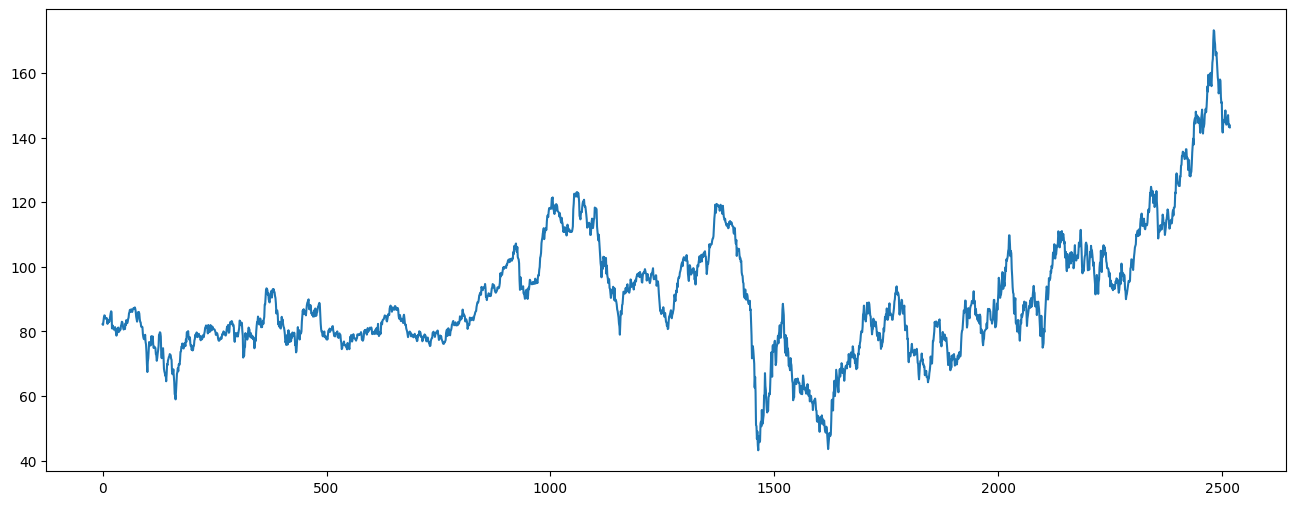

In [11]:
dataset['Open'].plot(figsize = (16,6))

In [13]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
X_train.shape

(1888, 4)

In [16]:
X_test.shape

(630, 4)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
print(regressor.coef_)

[-5.95789053e-01  7.70649411e-01  8.24480260e-01  4.18901480e-09]


In [20]:
print(regressor.intercept_)

0.11054223225295345


In [21]:
predicted = regressor.predict(X_test)

In [22]:
X_test

,Open,High,Low,Volume
840,89.970001,91.500000,89.849998,2039700
1264,83.169998,84.239998,83.129997,2781800
575,79.279999,79.339996,78.760002,2729900
944,90.589996,91.860001,90.110001,2922000
2275,101.000000,101.500000,98.750000,3653600
...,...,...,...,...
1295,100.199997,101.930000,99.830002,2468000
1101,117.900002,118.470001,117.070000,2306300
1411,112.080002,113.180000,111.379997,1607900
1697,81.470001,85.370003,81.160004,3213900


In [23]:
predicted.shape

(630,)

In [24]:
dframe = pd.DataFrame(y_test, predicted)

In [26]:
dfr = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted})

In [27]:
dfr

,Actual Price,Predicted Price
840,91.010002,91.109916
1264,84.120003,84.028967
575,79.110001,78.967210
944,91.830002,91.236027
2275,99.139999,99.589494
...,...,...
1295,101.919998,101.282980
1101,118.139999,117.697413
1411,112.199997,112.393949
1697,83.959999,84.290234


In [28]:
dfr.head(25)

,Actual Price,Predicted Price
840,91.010002,91.109916
1264,84.120003,84.028967
575,79.110001,78.967210
944,91.830002,91.236027
2275,99.139999,99.589494
923,104.629997,104.640935
892,97.860001,98.012883
1872,74.779999,75.189494
1560,61.959999,61.072528
1610,52.509998,51.924526


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
regressor.score(X_test, y_test)

0.999064139495326

In [31]:
import math

In [32]:
print('Mean Absoute Error: ', metrics.mean_absolute_error(y_test, predicted))

Mean Absoute Error:  0.4820481200016118


In [33]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error:  0.40568088056325197


In [34]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_absolute_error(y_test, predicted)))

Root Mean Squared Error:  0.694296852939441


In [35]:
graph = dfr.head(20)

<Axes: >

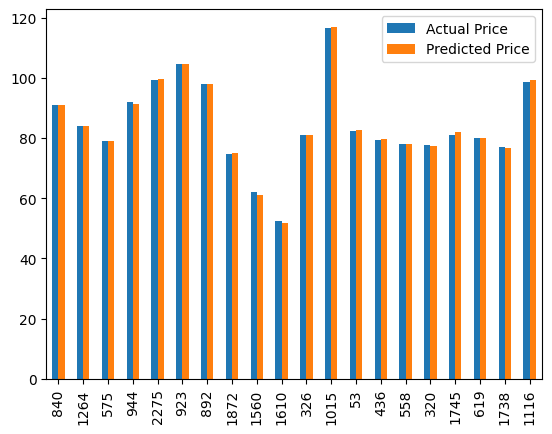

In [41]:
graph.plot(kind = 'bar')